In [187]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df1 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails1.csv")
df2 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails2.csv")

- First Trying to combine these two datasets

In [189]:
df1.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [190]:
df1.shape
df1.sample(2)
# 2500 ham and 500 spam emails in the dataset.
# 1 = Spam 
# 0 = Not Spam
df1.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [192]:
df1.duplicated().sum()

127

In [193]:
df1 = df1.drop_duplicates()


---
---

In [194]:
df2.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [195]:
df2.shape
# df2.sample(2)
# 0 = not spam 
# 1 = spam

(5736, 2)

In [196]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.8+ KB


In [197]:
# is there any weird value
df2.spam.value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [198]:
#let's discard them
zeros = df2[df2['spam']=='0']
ones = df2[df2['spam']=='1']
zeros['spam'].value_counts()
ones['spam'].value_counts()

1    1367
Name: spam, dtype: int64

In [199]:
df2 = pd.concat([zeros, ones], axis=0)
# df2.shape
df2['spam'].value_counts()


0    4359
1    1367
Name: spam, dtype: int64

In [200]:
# is there duplication
df2.duplicated().sum()

33

In [201]:
#let's first drop duplicates
df2 = df2.drop_duplicates()

it has 2 dimension, so it's combine them

In [202]:
print(df1.shape)
print(df2.shape)


(2873, 2)
(5693, 2)


- Renaming Columns


In [203]:
df1.rename(columns={'email':'text', 'label':'label'}, inplace=True)
df2.rename(columns={'spam':'label'}, inplace=True)

In [204]:
df2.label = df2.label.astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


- making one DataFrame

In [205]:
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df.shape

(8566, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

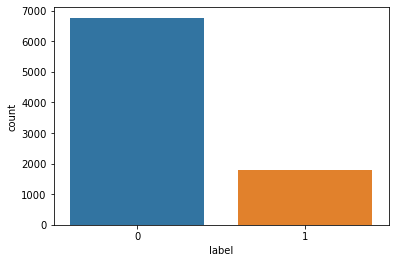

In [206]:
sns.countplot(df.label)

### **Balancing Data**

In [207]:
df[df.label==1]

,text,label
2445,save up to NUMBER on life insurance why spend...,1
2446,NUMBER fight the risk of cancer URL NUMBER sli...,1
2447,NUMBER fight the risk of cancer URL NUMBER sli...,1
2448,adult club offers free membership instant acc...,1
2449,i thought you might like these NUMBER slim dow...,1
...,...,...
8561,Subject: are you ready to get it ? hello ! v...,1
8562,Subject: would you like a $ 250 gas card ? do...,1
8563,"Subject: immediate reply needed dear sir , i...",1
8564,Subject: wanna see me get fisted ? fist bang...,1


In [208]:
#let's balance our data
not_spam=df[df.label==0].sample(1795)


In [209]:
spam = df[df.label==1]

In [210]:
print(not_spam.shape)
print(spam.shape)

(1795, 2)
(1795, 2)


In [211]:
#let's concatenate them 
df = pd.concat([not_spam, spam], ignore_index=True)

In [212]:
df.shape

(3590, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

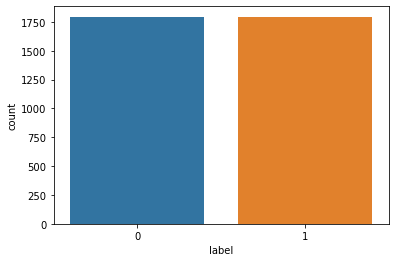

In [213]:
sns.countplot(df.label)

**Why did I balance dataset**
- Actually by upper dataset division my precision Score was about 0, and every prediction was just given straight 0
- After balancing dataset, I got precision score around 55, which is better, but not up to the mark! 

---

# **EDA**

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3590 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB


In [215]:
## let's see missing values
df.isnull().sum()

text     1
label    0
dtype: int64

In [216]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [217]:
# let's see duplicates
df.duplicated().sum()

0

## let's focus on label data


In [218]:
df.label.describe()

count    3589.000000
mean        0.499861
std         0.500070
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [219]:
df.label.unique()

array([0, 1], dtype=int64)

In [220]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


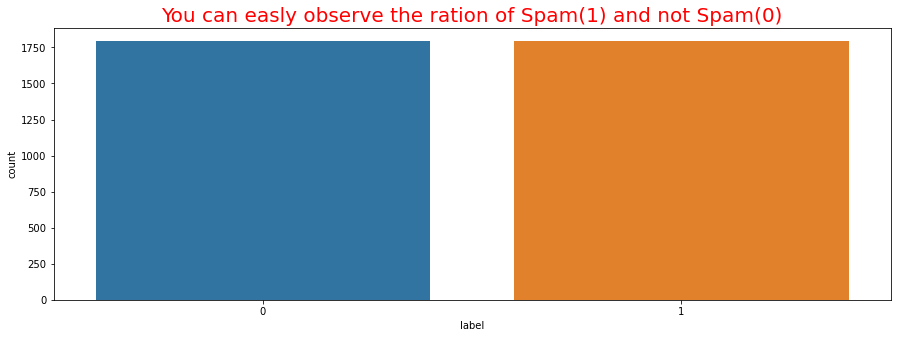

In [221]:
plt.figure(figsize=(15,5))
sns.countplot(df.label)
plt.title("You can easly observe the ration of Spam(1) and not Spam(0)", size=20, color='r')
plt.show()

## let's focus on Text

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3589 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.1+ KB


In [223]:
#let's see the total values
df.text.nunique()

3589

In [224]:
#are there duplicated values
df.text.duplicated().sum()

0

In [225]:
df.sample(10)

,text,label
3284,"Subject: you ' ve won $ 100 , 000 . claim it n...",1
818,Subject: re : subscription renewal stephanie ...,0
3085,Subject: re [ 7 ] : talk thread about his pill...,1
2222,hello this is chinese traditional 子 件 NUMBER世...,1
1566,"Subject: research support in london vince , ...",0
2043,would you like to know what the powerball winn...,1
2750,Subject: [ ilug - social ] everybody gets paid...,1
3098,Subject: in the heart of your business ! corp...,1
3578,"Subject: strictly private . gooday , with wa...",1
775,Subject: re : template for a proposal mark & ...,0


# **Text Preprocessing**

In [226]:
#let's first convert into lower case
df.text=df.text.str.lower()

- let's see whether we have Html tags or not


In [227]:
import re
def remove(text):
    pattern = re.compile('<.*?>')
    pattern.findall(text)

df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

- **let's see is there any URL:**


In [228]:
import re
def remove(text):
    pattern = re.compile("https?://\S+|www\.\S+")
    return pattern.search(text) 
df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

In [229]:
df.sample(5, random_state=1)  ## great we don't have any html tags as well as urls, :)

,text,label
664,http www quitpalestine org funny as all hell ...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: re : research and development charges...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: re : enron - resume interview of jame...,0


In [230]:
#as we can see, actual URLS have been replaced with URL, so it's should be removed
df.text = df.text.apply(lambda x: str(x).replace('URL',""))

In [231]:
df.text = df.text.apply(lambda x: str(x).replace('url',""))

In [232]:
df.sample(5, random_state=1) # we done it.

,text,label
664,http www quitpalestine org funny as all hell ...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: re : research and development charges...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: re : enron - resume interview of jame...,0


- **Let's remove all punctuation**

In [233]:
import string
exclude = string.punctuation

In [234]:
def remove_punctuation(text):
    for i in exclude:
        text = text.replace(i, " ")
    return text

df.text = df.text.apply(remove_punctuation)

- **Let's remove StopWords**

In [235]:
from gensim.parsing.preprocessing import remove_stopwords
df.text = df.text.apply(lambda x: remove_stopwords(x))

In [236]:
df.text[1]

'draw pain ken wrote method demonstrated workshops let physical pain body draw pain air finger number cm number foot high number seconds trace perimeter pain carefully listening pain precise boundary hurts repeat number minutes pain shift shrink disappear variant imagine making numberd model pain coloured clay works s coworker real pain ass middle finger trace outline number seconds listened boundary repeated motion left office original message fork admin mailto fork admin behalf stephen d williams sent thursday october number number number number pm fork subject living love legacy number s normally disdain kind mysticism associated fairly good ideas big turnoff good example difference yoga tm scientifically pure related relaxation techniques including betagenics hypnosis auto hypnosis topics obsessively absorbed teenager tai chi vs tai bo g force dyno staff having looking completely unrelated cute truisms particularly like addiction non addiction additionally mindprod treehugger site 

- **let's tokenize and lemmatize**

In [237]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizing(text):
    words = word_tokenize(text)
    string = []
    for word in words:
        string.append(wnl.lemmatize(word, pos='v')) ## 'v', handle verb acc to POS verbs.
    return ' '.join(string)

# exp = "Abu Ubaida, You are doing great work, keep doing"
# lemmatizing(exp)

In [238]:
df.text = df.text.apply(lemmatizing)

In [239]:
df.text.head()

0    subject internal guest access enrononline vinc...
1    draw pain ken write method demonstrate worksho...
2    t think china force yahoo info will wouldn t w...
3    subject friday brown bag lunch option price zi...
4    subject reschedule clayton problem ask shirley...
Name: text, dtype: object

- **let's correct all spelling, if there is any wrong**

In [240]:
# from textblob import TextBlob
# def correction(text):
#     tb = TextBlob(text)
#     return tb.correct()

# # correction("hi hoo ara youuss")
# df.text = df.text.apply(correction)

In [241]:
df.sample(5)

,text,label
2871,subject ready hello viagra 1 med struggle mens...,1
2788,subject blue horseshoe meet dear reader approa...,1
2022,attn edward mulete jr son mr steve mbeki mulet...,1
3313,subject attn presume mail surprise accountant ...,1
612,subject zhendong sure thing original message k...,0


# **Visualization of Top Words**

- let's see what are the top used word in Spam emails

In [242]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = 'white')

In [243]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

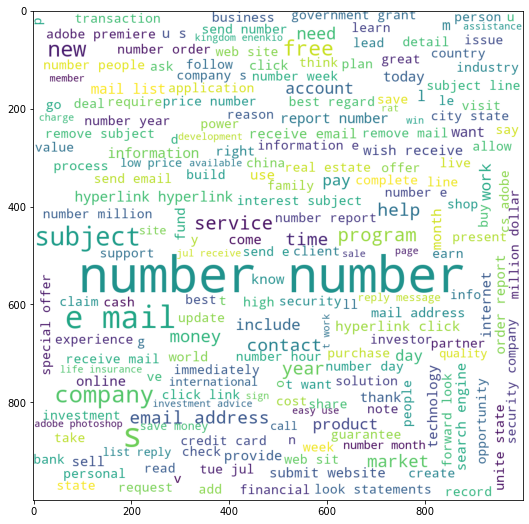

In [244]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- think, I should remove some unmeaningful words

In [245]:
usless = ['number', 'e mail']
for i in usless:
    df.text = df.text.str.replace(i, '')


In [246]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

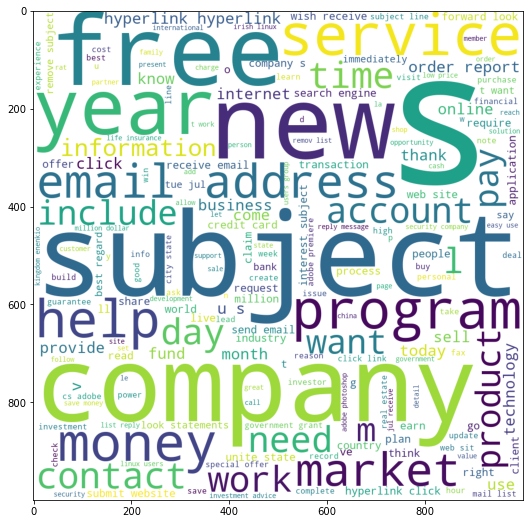

In [247]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- we can clearly see, these are the words, which lead messages to be spam.

### let's plot word graph for Not_Spam emails

In [248]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))

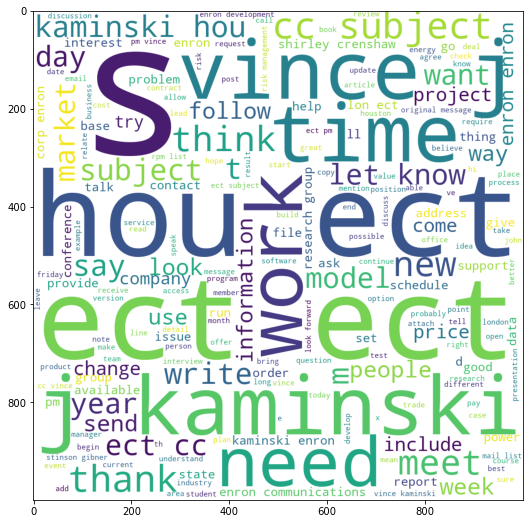

In [249]:
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

- let's remove some unmeaningful words from text

In [250]:
usless = ['ect', 'hou','kaminski', 'enron', 'cc', 'vince', 'crenshaw', ' s ', ' m ', 'stinson gibner', 'subj' ]
for i in usless:
    df.text = df.text.str.replace(i, '')


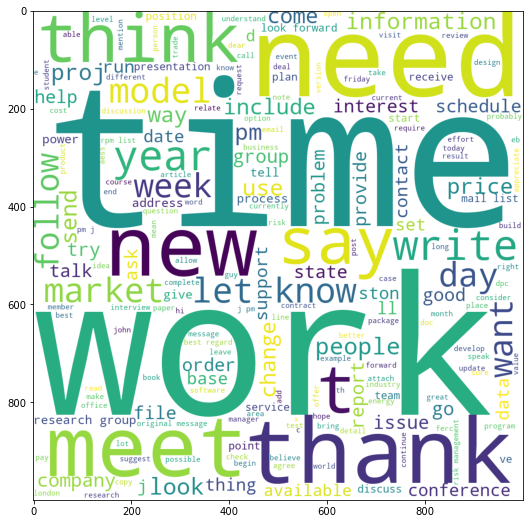

In [251]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

# **Advance Text Preprocessing**

In [252]:
X = df.text
y = df.label

In [253]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **TF-IDF**

In [254]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_trian).toarray()
X_test_tfidf = tfidf.fit_transform(X_test).toarray()

In [255]:
## AS we know Naive_bayes is best for text classification 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  confusion_matrix, recall_score, precision_score,accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold, cross_val_score

models1 = [GaussianNB(), BernoulliNB(), MultinomialNB(), RandomForestClassifier()] 
models2= [DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]
models3 = [ AdaBoostClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier()]

- **Rough Testing**

In [256]:
for model in models1:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)

    print(f'recall score of {model} = {recall_score(y_pred, y_test)}')
    print(f"Accuracy Score of {model} = {accuracy_score(y_pred, y_test)}")
    print(f'Confusion metric of {model} is \n{confusion_matrix(y_pred, y_test)}', end='\n\n\n')
    

recall score of GaussianNB() = 0.5307443365695793
Accuracy Score of GaussianNB() = 0.5431754874651811
Confusion metric of GaussianNB() is 
[[226 183]
 [145 164]]


recall score of BernoulliNB() = 0.6245954692556634
Accuracy Score of BernoulliNB() = 0.6239554317548747
Confusion metric of BernoulliNB() is 
[[255 154]
 [116 193]]


recall score of MultinomialNB() = 0.630188679245283
Accuracy Score of MultinomialNB() = 0.6128133704735376
Confusion metric of MultinomialNB() is 
[[273 180]
 [ 98 167]]


recall score of RandomForestClassifier() = 0.5440528634361234
Accuracy Score of RandomForestClassifier() = 0.5724233983286908
Confusion metric of RandomForestClassifier() is 
[[164 100]
 [207 247]]




In [257]:
for model in models2:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)

    print(f'recall score of {model} = {recall_score(y_pred, y_test)}')
    print(f"Accuracy Score of {model} = {accuracy_score(y_pred, y_test)}")
    print(f'Confusion metric of {model} is \n{confusion_matrix(y_pred, y_test)}', end='\n\n\n')

recall score of DecisionTreeClassifier() = 0.4894837476099426
Accuracy Score of DecisionTreeClassifier() = 0.5013927576601671
Confusion metric of DecisionTreeClassifier() is 
[[104  91]
 [267 256]]


recall score of KNeighborsClassifier() = 0.4832869080779944
Accuracy Score of KNeighborsClassifier() = 0.4832869080779944
Confusion metric of KNeighborsClassifier() is 
[[  0   0]
 [371 347]]


recall score of SVC() = 0.6990291262135923
Accuracy Score of SVC() = 0.5738161559888579
Confusion metric of SVC() is 
[[340 275]
 [ 31  72]]


recall score of LogisticRegression() = 0.703125
Accuracy Score of LogisticRegression() = 0.5891364902506964
Confusion metric of LogisticRegression() is 
[[333 257]
 [ 38  90]]




In [258]:
for model in models3:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)

    print(f'recall score of {model} = {recall_score(y_pred, y_test)}')
    print(f"Accuracy Score of {model} = {accuracy_score(y_pred, y_test)}")
    print(f'Confusion metric of {model} is \n{confusion_matrix(y_pred, y_test)}', end='\n\n\n')

recall score of AdaBoostClassifier() = 0.6041666666666666
Accuracy Score of AdaBoostClassifier() = 0.5584958217270195
Confusion metric of AdaBoostClassifier() is 
[[314 260]
 [ 57  87]]


recall score of ExtraTreesClassifier() = 0.6022471910112359
Accuracy Score of ExtraTreesClassifier() = 0.6434540389972145
Confusion metric of ExtraTreesClassifier() is 
[[194  79]
 [177 268]]


recall score of GradientBoostingClassifier() = 0.6162790697674418
Accuracy Score of GradientBoostingClassifier() = 0.5724233983286908
Confusion metric of GradientBoostingClassifier() is 
[[305 241]
 [ 66 106]]




In [259]:
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [260]:
y_pred = xgb.predict(X_test_tfidf)

In [261]:
print(recall_score(y_pred, y_test))
accuracy_score(y_pred, y_test)

0.5497835497835498


0.5487465181058496

- Results are not up to the mark, but there are some Algorithms which are performing better than other so let's tune them. 
**We know that Naive Bayes is best for textual data. It has been Proved**

In [262]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
cnb = ComplementNB()
mnb = MultinomialNB()
logic = LogisticRegression() 
svc = SVC()

In [263]:
lis = [gnb, bnb, cnb, mnb, logic, svc]
for i in lis:
    i.fit(X_train_tfidf, y_train)
    y_pred=i.predict(X_train_tfidf)
    print(f'mode name is = {i}')
    print(f'recall_score is = {recall_score(y_pred, y_train)}')
    # print(f'precision_score is = {precision_score(y_pred, y_test)}')
    # print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
    print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

mode name is = GaussianNB()
recall_score is = 0.9823008849557522
confusion matrix
 [[1398    4]
 [  26 1443]]
mode name is = BernoulliNB()
recall_score is = 0.9706498951781971
confusion matrix
 [[1382   58]
 [  42 1389]]
mode name is = ComplementNB()
recall_score is = 0.9732693625771076
confusion matrix
 [[1385   27]
 [  39 1420]]
mode name is = MultinomialNB()
recall_score is = 0.9720136518771331
confusion matrix
 [[1383   23]
 [  41 1424]]
mode name is = LogisticRegression()
recall_score is = 0.9895833333333334
confusion matrix
 [[1409   22]
 [  15 1425]]
mode name is = SVC()
recall_score is = 0.9993093922651933
confusion matrix
 [[1423    0]
 [   1 1447]]


In [264]:
lis = [gnb, bnb, cnb, mnb, logic]
for i in lis:
    i.fit(X_train_tfidf, y_train)
    y_pred=i.predict(X_test_tfidf)
    print(f'mode name is = {i}')
    print(f'recall_score is = {recall_score(y_pred, y_test)}')
    # print(f'precision_score is = {precision_score(y_pred, y_test)}')
    print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
    print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

mode name is = GaussianNB()
recall_score is = 0.5307443365695793
accuracy score is = 0.5431754874651811
confusion matrix
 [[226 183]
 [145 164]]
mode name is = BernoulliNB()
recall_score is = 0.6245954692556634
accuracy score is = 0.6239554317548747
confusion matrix
 [[255 154]
 [116 193]]
mode name is = ComplementNB()
recall_score is = 0.6269230769230769
accuracy score is = 0.6086350974930362
confusion matrix
 [[274 184]
 [ 97 163]]
mode name is = MultinomialNB()
recall_score is = 0.630188679245283
accuracy score is = 0.6128133704735376
confusion matrix
 [[273 180]
 [ 98 167]]
mode name is = LogisticRegression()
recall_score is = 0.703125
accuracy score is = 0.5891364902506964
confusion matrix
 [[333 257]
 [ 38  90]]


- From These all Algorithms I will pick the best one.

# **Tunning**

In [265]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

#### **Logistic regression**

In [266]:
#let's tune logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rand_cv = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [267]:
rand_cv.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [268]:
print(f'Train Accuracy : {rand_cv.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {rand_cv.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{rand_cv.best_score_:.3f}')
print(f'Best Parameters : ',rand_cv.best_params_)

Train Accuracy : 0.999
Test Accuracy : 0.570
Best Accuracy Through Grid Search :0.968
Best Parameters :  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [333]:
logic = LogisticRegression(solver='lbfgs', penalty='l2', C=10) 
logic.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

- let's check overfitting and underfitting

In [334]:
y_pred = logic.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 1.0
precision_score is = 0.9972527472527473
accuracy score is = 0.9986065954482118
confusion matrix
 [[1061    3]
 [   0 1089]]


In [335]:
y_pred = logic.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.6157303370786517
precision_score is = 0.3903133903133903
accuracy score is = 0.5828690807799443
confusion matrix
 [[563 428]
 [171 274]]


- **Model is not Overfitted, cause Training Score(99) is greater than Validation Score(96)**
- As Training Accuracy is much higher than Testing Accuracy,apparently model has remembered all training data, so I think I should change the split on 40% 

# **SVC** 

In [331]:
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']

# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv,scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train_tfidf, y_train)

# # it was taking to much time...

# **BernoulliNB**

In [273]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [274]:
print(f'Train Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{bernoulli_nb_grid.best_score_:.3f}')
print(f'Best Parameters : ',bernoulli_nb_grid.best_params_)

Train Accuracy : 0.970
Test Accuracy : 0.628
Best Accuracy Through Grid Search :0.955
Best Parameters :  {'alpha': 0.01}


- let's train on these features

In [275]:
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=0.01)

In [276]:
y_pred = bnb.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 0.9755415793151643
precision_score is = 0.9647546648237734
accuracy score is = 0.970045280390108
confusion matrix
 [[1389   51]
 [  35 1396]]


In [277]:
y_pred = bnb.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.6351351351351351
precision_score is = 0.5417867435158501
accuracy score is = 0.628133704735376
confusion matrix
 [[263 159]
 [108 188]]


- This model is not Overfitted :(, because Validation score(0.95) is less then Training Score(97). 
- let's see what happen after 40% split

## **Changing Train_Test_split**

- as best estimator score (validation score) is equal to Training score with best parameters, which is not good (Overfit), so let's change the distribution

In [278]:
X = df.text
y = df.label

In [279]:
print(X.shape)
print(y.shape)

(3589,)
(3589,)


In [280]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train4).toarray()
X_test_tfidf= tfidf.fit_transform(X_test4).toarray()

- let's try again

## **Bernoulli NB**

In [282]:
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=0.01)

In [283]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [284]:
print(f'Train Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{bernoulli_nb_grid.best_score_:.3f}')
print(f'Best Parameters : ',bernoulli_nb_grid.best_params_)

Train Accuracy : 0.973
Test Accuracy : 0.577
Best Accuracy Through Grid Search :0.956
Best Parameters :  {'alpha': 1.0}


In [285]:
bnb = BernoulliNB(alpha=1)
bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=1)

In [286]:
y_pred = bnb.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 0.9777983348751156
precision_score is = 0.967948717948718
accuracy score is = 0.9725963771481654
confusion matrix
 [[1037   35]
 [  24 1057]]


In [287]:
y_pred = bnb.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.5685131195335277
precision_score is = 0.5555555555555556
accuracy score is = 0.5766016713091922
confusion matrix
 [[438 312]
 [296 390]]


##### **Model is not Overfit, because Validation score(0.95) is less than Training score(0.97)**

# **GaussianNB**

In [288]:
gnb = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
gs_NB.fit(X_train_tfidf, y_train)

gs_NB.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.01873817422860384}

- for checking the overfitting

In [336]:
cv = cross_val_score(GaussianNB(var_smoothing = 0.01873817422860384), X_train_tfidf, y_train, cv=5, n_jobs=-1, scoring='accuracy')

In [337]:
cv.mean()

0.9345146495440566

In [338]:
gnb = GaussianNB(var_smoothing=0.01873817422860384)
gnb.fit(X_train_tfidf, y_train)
y_pred = gnb.predict(X_train_tfidf)

print('Accuracy Score is', accuracy_score(y_pred, y_train))

Accuracy Score is 0.9832791453785416


In [339]:
y_pred = gnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.49025069637883006
precision_score is = 0.4985754985754986
recall score is = 0.4794520547945205
confusion matrix
 [[354 352]
 [380 350]]


- Gaussian NB is not Overfit, because Training Score is greater than Validation score, Splitting effected 

# **Complement NB** 

In [356]:
cnb = ComplementNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cnb_NB = GridSearchCV(estimator=cnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
cnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=ComplementNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [357]:
print(f'Train Accuracy : {cnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {cnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{cnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',cnb_NB.best_params_)

Train Accuracy : 0.980
Test Accuracy : 0.574
Best Accuracy Through Grid Search :0.959
Best Parameters :  {'alpha': 1.0}


In [415]:
cnb = ComplementNB(alpha=1.0)
cnb.fit(X_train_tfidf, y_train)

ComplementNB()

In [416]:
y_pred = mnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5766016713091922
precision_score is = 0.5555555555555556
recall score is = 0.5685131195335277
confusion matrix
 [[438 312]
 [296 390]]


# **Multinomial NB**

In [359]:
mnb = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
mnb_NB = GridSearchCV(estimator=mnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
mnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [360]:
print(f'Train Accuracy : {mnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {mnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{mnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',mnb_NB.best_params_)

Train Accuracy : 0.980
Test Accuracy : 0.570
Best Accuracy Through Grid Search :0.960
Best Parameters :  {'alpha': 1.0}


In [417]:
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [418]:
y_pred = mnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5696378830083565
precision_score is = 0.4829059829059829
recall score is = 0.5707070707070707
confusion matrix
 [[479 363]
 [255 339]]


- both mulitinomial and complement NB are in same situation. both are not overfit. but test accuracy is poor

## **Logistic Regression**

In [293]:
#let's tune logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rand_cv = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [294]:
rand_cv.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [295]:
print(f'Train Accuracy : {rand_cv.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {rand_cv.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{rand_cv.best_score_:.3f}')
print(f'Best Parameters : ',rand_cv.best_params_)  

Train Accuracy : 0.999
Test Accuracy : 0.583
Best Accuracy Through Grid Search :0.965
Best Parameters :  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [340]:
logic = LogisticRegression(solver='lbfgs', penalty='l2', C=10) 
logic.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [341]:
y_pred = logic.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 1.0
precision_score is = 0.9972527472527473
accuracy score is = 0.9986065954482118
confusion matrix
 [[1061    3]
 [   0 1089]]


In [342]:
y_pred = logic.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.6157303370786517
precision_score is = 0.3903133903133903
accuracy score is = 0.5828690807799443
confusion matrix
 [[563 428]
 [171 274]]


- **Model is not Overfitted, because Validation Score(0.96) is less than Traing Score(.99)** 

- Overall, I got good changes from splitting on 40%, now let's combine them for getting more accurate and best performance. let's see!

# **Voting Classifier**


- Combination of Bernoulli, multinomial, and complement 

In [427]:
from sklearn.ensemble import VotingClassifier
estimators = [('bnb',BernoulliNB(alpha=1.0)), ('mnb', MultinomialNB(alpha=1.0)), ('cnb',ComplementNB(alpha=1.0))]
vcNB= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [428]:
vcNB.fit(X_train_tfidf, y_train)

y_pred = vcNB.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5250696378830083
precision_score is = 0.42165242165242167
recall score is = 0.5174825174825175
confusion matrix
 [[458 406]
 [276 296]]


- combination of Gaussian, Bernoulli, and logistic Reg

In [343]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=1.0)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10) )]
vc0 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [344]:
vc0.fit(X_train_tfidf, y_train)

y_pred = vc0.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, overfitted  these were the scores
# This is the score of fist one
# - Accuracy Score is 0.7717454757734968
# - precision_score is = 0.049786628733997154
# - recall score is = 0.2348993288590604
# - confusion matrix
# -   [[2609  668]
# -    [ 114   35]]

# before balancing 
# Accuracy Score is 0.7901342673671921
# precision_score is = 0.07571428571428572
# recall score is = 0.424
# confusion matrix
#  [[2654  647]
#  [  72   53]]

Accuracy Score is 0.5731197771587744
precision_score is = 0.4829059829059829
recall score is = 0.5755517826825127
confusion matrix
 [[484 363]
 [250 339]]


- combination of Bernoulli and LogisticRegression

In [345]:
from sklearn.ensemble import VotingClassifier
estimators = [ ('bnb',BernoulliNB(alpha=1)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10))]
vc1 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [346]:
vc1.fit(X_train_tfidf, y_train)


y_pred = vc1.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, this was the result or when it was overfitted
# Accuracy Score is 0.7772913018096906
# precision_score is = 0.017069701280227598
# recall score is = 0.14285714285714285
# confusion matrix
#  [[2651  691]
#  [  72   12]]

# before balancing 
# Accuracy Score is 0.8012259194395797
# precision_score is = 0.05142857142857143
# recall score is = 0.6792452830188679
# confusion matrix
#  [[2709  664]
#  [  17   36]]


Accuracy Score is 0.5724233983286908
precision_score is = 0.31196581196581197
recall score is = 0.6257142857142857
confusion matrix
 [[603 483]
 [131 219]]


- combination of GaussianNB and LogisticRegression


In [347]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10) )]
vc2 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [348]:
vc2.fit(X_train_tfidf, y_train)


y_pred = vc2.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, this was the result or when it was overfitted
# Accuracy Score is 0.7828371278458844
# precision_score is = 0.01991465149359886
# recall score is = 0.2028985507246377
# confusion matrix
#  [[2668  689]
#  [  55   14]]

Accuracy Score is 0.5584958217270195
precision_score is = 0.29914529914529914
recall score is = 0.5965909090909091
confusion matrix
 [[592 492]
 [142 210]]


- Combination of GaussianNB and BernoulliNB

In [349]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=1.0))]
vc3 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [350]:
vc3.fit(X_train_tfidf, y_train)

y_pred = vc3.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, this was the result or when it was overfitted
# Accuracy Score is 0.7831290134267367
# precision_score is = 0.02702702702702703
# recall score is = 0.24358974358974358
# confusion matrix
#  [[2664  684]
#  [  59   19]]

Accuracy Score is 0.5466573816155988
precision_score is = 0.37037037037037035
recall score is = 0.5543710021321961
confusion matrix
 [[525 442]
 [209 260]]


- As I have to maintain the good precision score, so I will use Binomial NB which is better in precision score than others. 


In [330]:
print(y_test[y_test==1].count())
print(y_test[y_test==0].count())


702
734


#### **Testing**

In [308]:
test = str(df1.text.sample())

In [432]:
import re
import string 
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
import num2words 

def purification(text):
    #converting to lower case
    text = text.lower()

    # removing html tags
    pattern_html = re.compile('<.*?>')
    text=pattern_html.sub(" ", text) 

    #removing urls
    pattern_urls = re.compile('https?://\S +|www\.\S+')
    text = pattern_urls.sub(' ', text)

    #removing punctuations
    for i in string.punctuation:
        text = text.replace(i, "")
    
    #rectifying Spelling mistakes
    text = TextBlob(text).correct()

    #lemmatizing text
    words = word_tokenize(str(text)) ###
    lemm_string = []
    for word in words:
        lemm_string.append(wnl.lemmatize(word, pos='v'))
    text =  ' '.join(lemm_string)

    #removing Stop words
    text = remove_stopwords(text) 
    
    return text


### **Testing**

In [433]:
no=df2[df2.label==1].sample().index[0]
text = df.text[no]
text = purification(text)
text

'program successful free jump balloon ft relevance astronauts s ballot achievement comfortably chuck monday september owen bear write john hall write fast normal terminal velocity slower article person try break highest free fall record die attempt new jersey truck driver nick piantanida suffer catastrophe equipment failure facemask blow feet lack oxygen cause severe brain damage coma die months later flash discover break sound barrier presumably reach speed owen original message fork admit mail fork admit behalf bitbitch send sunday september robert harley fork big jump qualify darwin award t freak french people oh today french officer michel fournier suppose oh metre tall medium balloon ride edge space oh attitude jump fall minutes reach oh speed hop open parachute mentally oh end automatic second oh grind hasn t open oh r oh quote oh vederò si avert si gross li coglioni come ha il di franz oh leave ball king france oh pope julius ii january best regard bitbitch mail bitbitch'

In [434]:
text = tfidf.transform([text]).toarray()

value =mnb.predict(text)[0]
if value!=0:
    print('Spam = 1')
else:
    print("Not Spam = 0")

Spam = 1


either balance data 
or choose different one.


## ***Deployment***

In [312]:
import pickle
pickle.dump(purification, open("purification.pkl", 'wb'))
pickle.dump(tfidf, open('transformer.pkl', 'wb'))
pickle.dump(bnb, open("model.pkl", 'wb'))